# Conversion Rate Analysis

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Importance](#Part-4:-Feature-Improtance)

# Part 1: Data Exploration

In [54]:
import pandas as pd
import numpy as np

In [55]:
conversion_df = pd.read_csv("conversion_project.csv")
conversion_df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


## Part 1.1 Understand the Raw Dataset

In [56]:
# check data info
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


**Observations:**

There are 316,200 observations, and 5 features, which are "country", "age", "new_user", "source", and "total_pages_visited". "age" and "total_pages_visited" are numerical features.
"country", "new_user" and "source" are categorical features.

In [57]:
# check the unique values for each column
conversion_df.nunique()

country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64

In [58]:
# Check missing values
conversion_df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

## Part 1.2 Understand the features

In [59]:
# understand numerical features
# there are two types of numerical features: discrete and continuous
# discrete: "age", "total_pages_visited"
# no continuous features in this dataset
conversion_df[['age', 'total_pages_visited']].describe()

,age,total_pages_visited
count,316200.000000,316200.000000
mean,30.569858,4.872966
std,8.271802,3.341104
min,17.000000,1.000000
25%,24.000000,2.000000
50%,30.000000,4.000000
75%,36.000000,7.000000
max,123.000000,29.000000


In [60]:
# check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='converted', ylabel='total_pages_visited'>

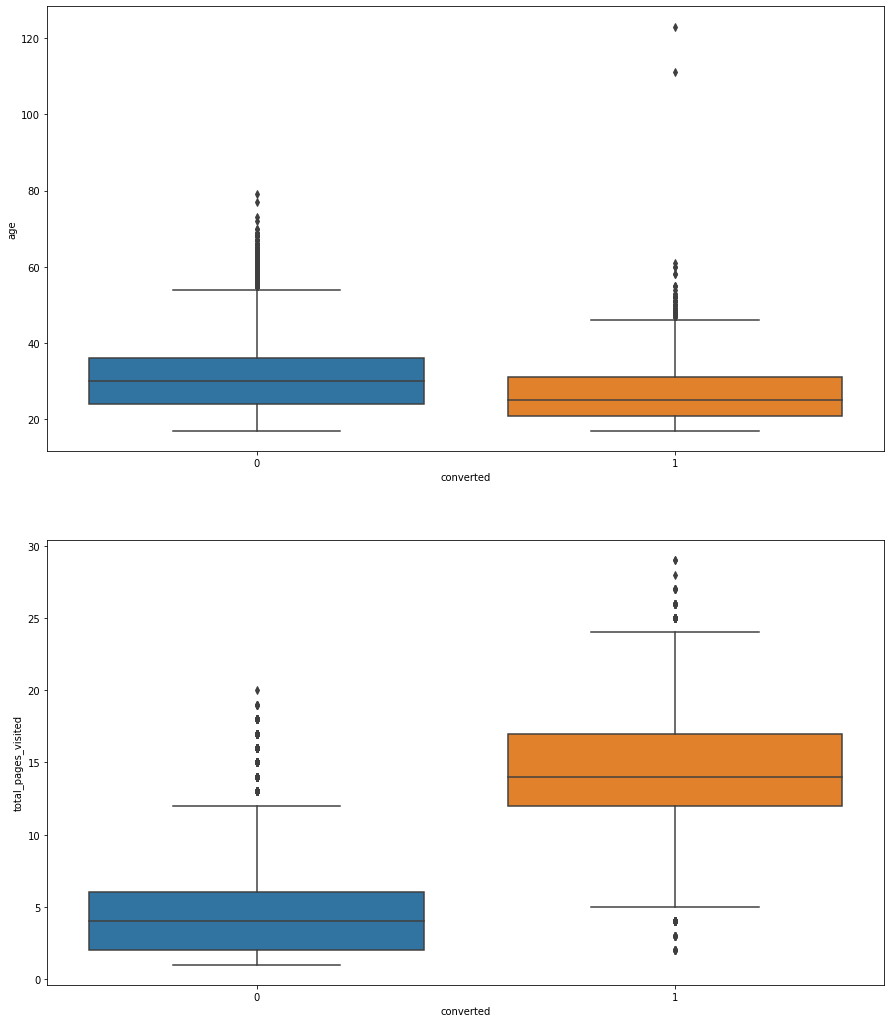

In [61]:
# boxplot for numerical features
# check if there are outliers
_,axss = plt.subplots(2, figsize=[15,18])
sns.boxplot(x='converted', y ='age', data=conversion_df, ax=axss[0])
sns.boxplot(x='converted', y ='total_pages_visited', data=conversion_df, ax=axss[1])

**Observations:**

1. For the "age" feature, there are two users over 100 years old, which could be considered as outliers.
2. for the "age" feature, the converted population has a lower level than the unconverted population.
3. For the "total_page_viewed" feature, it is seen that the more pages viewed, the higher chance that the convertion happens.

In [62]:
# remove the outliers from df
conversion_df = conversion_df[conversion_df["age"] < 100]

In [63]:
conversion_df.shape[0]

316198

D:\Program\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Program\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_pages_visited', ylabel='Density'>

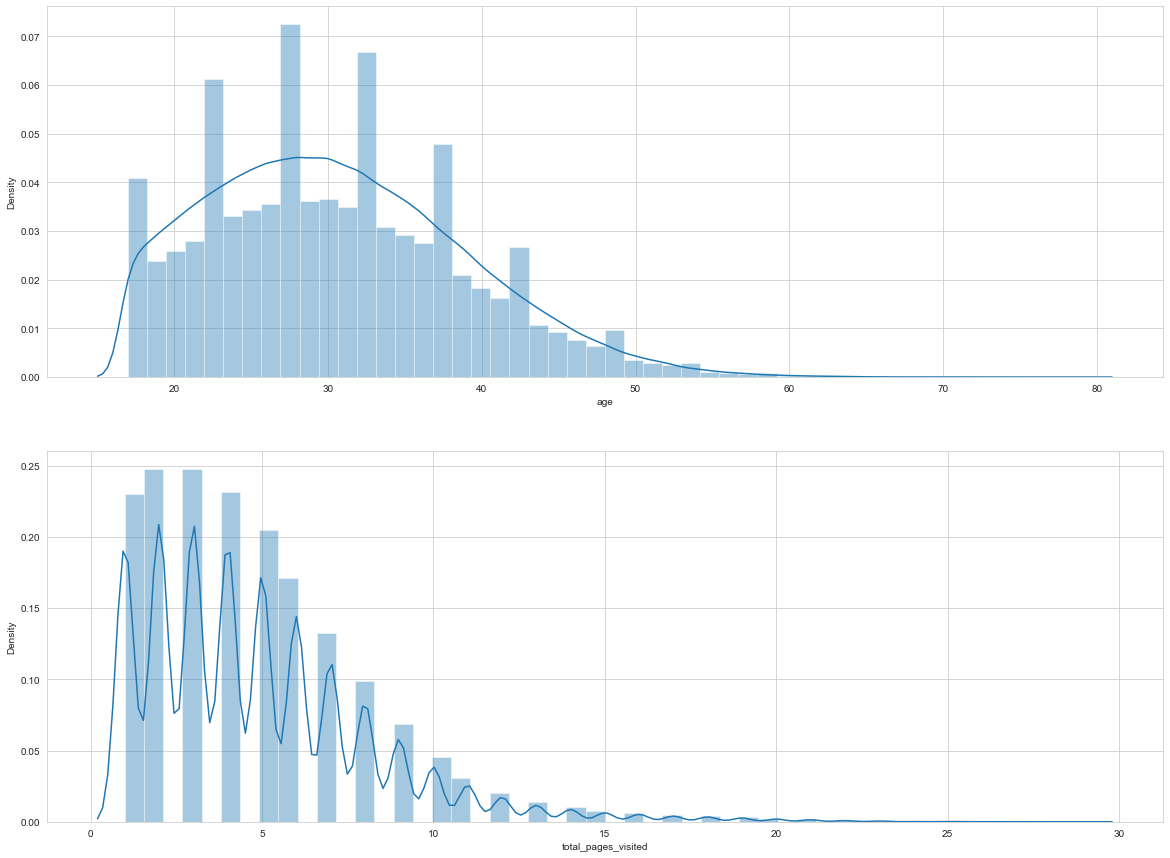

In [64]:
# distplot for the distribution of numerical features
sns.set_style('whitegrid')
_, axss = plt.subplots(2, figsize = [20, 15])
sns.distplot(conversion_df["age"], ax = axss[0])
sns.distplot(conversion_df["total_pages_visited"], ax = axss[1])

<AxesSubplot:xlabel='country'>

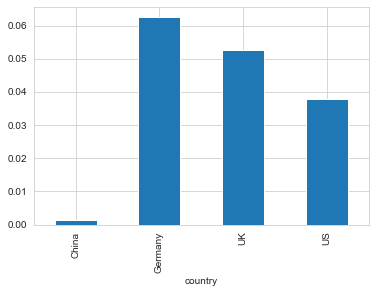

In [65]:
# understand categorical features:
# 'country', 'new_user', and 'source'
conversion_df.groupby(['country'])['converted'].mean().plot.bar()

In [66]:
# check the population for each Country
df_country_groupby = conversion_df.groupby(["country"])["converted"].value_counts().unstack()
df_country_groupby

converted,0,1
country,,
China,76500,102
Germany,12240,815
UK,45900,2549
US,171360,6732


<AxesSubplot:xlabel='new_user'>

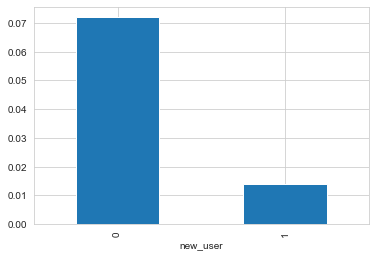

In [67]:
conversion_df.groupby(['new_user'])['converted'].mean().plot.bar()

In [68]:
# check the population for user 
df_country_groupby = conversion_df.groupby(["new_user"])["converted"].value_counts().unstack()
df_country_groupby

converted,0,1
new_user,,
0,92295,7159
1,213705,3039


<AxesSubplot:xlabel='source'>

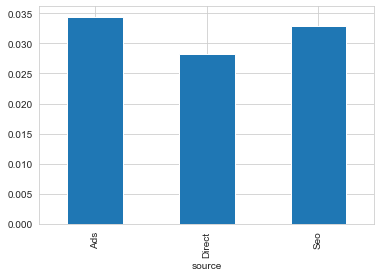

In [69]:
conversion_df.groupby(['source'])['converted'].mean().plot.bar()

In [70]:
# check the population for each Source 
df_country_groupby = conversion_df.groupby(["source"])["converted"].value_counts().unstack()
df_country_groupby

converted,0,1
source,,
Ads,85680,3059
Direct,70380,2040
Seo,149940,5099


**Observations**

1. 'Country' --> the users in China have the lowest convertion rate, and that in Germany have the highest convertion rate.
2. 'Country' --> the population of German is small with the highest convertion rate, we need to market on German more.
3. 'new_user' --> The old users have a higher convertion rate.
4. 'source' --> ads has a higher convertion rate.

It is seen that the users from different sources has close convertion rate.

<AxesSubplot:>

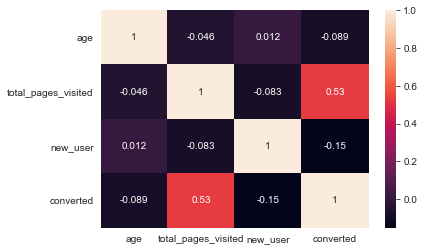

In [71]:
# correlations between features
corr_score = conversion_df[['age', 'total_pages_visited', "new_user", 'converted']].corr()

# show heapmap of correlations and the actual values of correlations
sns.heatmap(corr_score, annot=True)

# Part 2: Feature Preprocessing

In [72]:
# review the data frame again
conversion_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [73]:
# use one one hot encoding to deal with the categorical features: "country", "new_user", and "source"
_conversion_df = pd.get_dummies(conversion_df, columns=["country","new_user", "source"], drop_first=False)

In [74]:
_conversion_df.head()

,age,total_pages_visited,converted,country_China,country_Germany,...,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
0,25,1,0,0,0,...,0,1,1,0,0
1,23,5,0,0,0,...,0,1,0,0,1
2,28,4,0,0,0,...,0,1,0,0,1
3,39,5,0,1,0,...,0,1,0,0,1
4,30,6,0,0,0,...,0,1,0,0,1


In [75]:
# Get target variable
y = _conversion_df["converted"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64

In [76]:
# Get features by dropping the label
x = _conversion_df.drop("converted", axis = 1)
x.head()

,age,total_pages_visited,country_China,country_Germany,country_UK,...,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
0,25,1,0,0,1,...,0,1,1,0,0
1,23,5,0,0,0,...,0,1,0,0,1
2,28,4,0,0,0,...,0,1,0,0,1
3,39,5,1,0,0,...,0,1,0,0,1
4,30,6,0,0,0,...,0,1,0,0,1


# Part 3: Model Training and Results Evaluation

## Part 3.1: Split Dataset

In [77]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
# make the distribution the same as label y
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, stratify = y, random_state=1)

print("training data has " + str(x_train.shape[0]) + " observation with " + str(x_train.shape[1]) + " features")
print("test data has " + str(x_test.shape[0]) + " observation with " + str(x_test.shape[1]) + " features")

training data has 252958 observation with 11 features
test data has 63240 observation with 11 features


In [78]:
# Scale the data, using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Part 3.2: Model Training and Selection

In [79]:
# Try logistic regression
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

In [80]:
# Model Selection
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ["Logistic Regression"]
model_list = [classifier_logistic]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, x_train, y_train, cv=5)
    print(cv_score)
    print("Model accuracy of " + model_names[count] + " is " + str(cv_score.mean()))
    count += 1

[0.98606499 0.98598593 0.98683586 0.98592635 0.98679607]
Model accuracy of Logistic Regression is 0.9863218403005257


Without hyperparameters tuning, the model performs well.

## Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [81]:
from sklearn.model_selection import GridSearchCV

### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [82]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value for L1 and L2

parameters = {
    "penalty":("l1", "l2") 
    , "C":(0.01, 0.05, 0.1, 0.5, 1, 5, 10) 
}
Grid_LR = GridSearchCV(LogisticRegression(solver="liblinear"),parameters, cv=5)
Grid_LR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [83]:
# the best hyperparameter combination
Grid_LR.best_params_

{'C': 5, 'penalty': 'l1'}

In [84]:
# best score
Grid_LR.best_score_

0.986325793572847

In [85]:
# best model
best_LR_model = Grid_LR.best_estimator_
best_LR_model

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [86]:
# use testing/hold out data to check the model again
best_LR_model.score(x_test, y_test)

0.9855629348513599

## Part 3.4: Model Evaluation

*Confusion Matrix and ROC & AUC*

### Part3.4.1: Confusion Matrix

*Precision, Recall, Accuracy*

class of interest as positive

tp: correctly labeled real conversion

Precision(positive predictive value): tp / (tp + fp)

Recall(sensitivity, true positive rate): tp / (tp + fn)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [88]:
# Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
# The first row of this matrix considers the negative class
# The second row of this matrix considers the positive class
# The first column of this matrix considers the negtive prediction
# The second column of this matrix considers the positive prediction

# True Negtive --> real negative --> cm[0][0]
# False Positive --> real negative --> cm[0][1]
# True Positive --> real positive --> cm[1][1]
# False Negative --> real positive --> cm[1][0]

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not converted','Converted']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logistic Regression
Accuracy is: 0.9855629348513599
precision is: 0.8454935622317596
recall is: 0.6759803921568628


<ipython-input-88-dc682cec0ede>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-88-dc682cec0ede>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


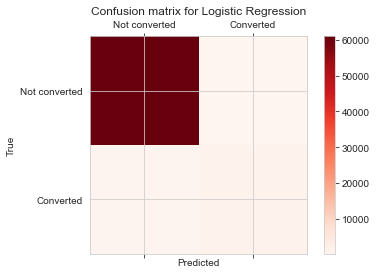

In [89]:
# Confusion matrix, accuracy, precison and recall for logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(x_test)))
]

draw_confusion_matrices(confusion_matrices)

### Part3.4.2: ROC & AUC

In [90]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [91]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

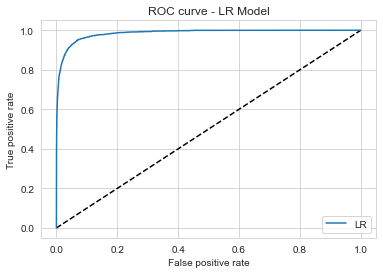

In [92]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_lr, tpr_lr, label="LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve - LR Model")
plt.legend(loc="best")
plt.show()

In [93]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.9853990492438806

Overall, since the larger AUC is, the better classfication performance your classifier has.

# Part 4: Feature Importance

## Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

In [94]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
x_l1 = scaler.fit_transform(x)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 1, solver="liblinear")
LRmodel_l1.fit(x_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(x.shape[1]):
  print ("{0} : {1}".format(x.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
total_pages_visited : 2.532
country_China : -1.387
age : -0.6117
new_user_1 : -0.4089
new_user_0 : 0.3978
country_UK : 0.1305
country_Germany : 0.1129
source_Direct : -0.0678
source_Ads : 0.0105
source_Seo : 0.0
country_US : 0.0


**Conclusions and next steps:**


1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use channels which are more likely to reach young users.

2. The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.

3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try. Maybe go through the UI and figure out why older users perform so poorly? 

4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, or maybe some payment issue. Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
